In [1]:
#Import Modules
import datacube
import datetime
import fiona
import geopandas as gpd
import numpy as np
import pandas as pd
import rasterio.mask
import rasterio.features
from shapely import geometry
import seaborn as sns
import sys
import xarray as xr

import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from datacube.storage import masking
from datacube.utils import geometry
from datacube.helpers import ga_pq_fuser, write_geotiff
from datacube.helpers import write_geotiff

sys.path.append('/g/data/u46/users/ck9738/10_Scripts')
import TasseledCapTools

dc = datacube.Datacube(app='tcw')

%load_ext autoreload

%autoreload 2

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 

In [3]:
training_data_file = '/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Glue_subsets/training_data_1.csv'

training_data_file_SUBSET = '/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Glue_subsets/training_data_complexer_50pct.csv'



In [4]:
#open csv with a random subset and then save that to file
training_data = pd.read_csv(training_data_file)

subset = training_data.sample(frac=0.3)
subset.to_csv(training_data_file_SUBSET)

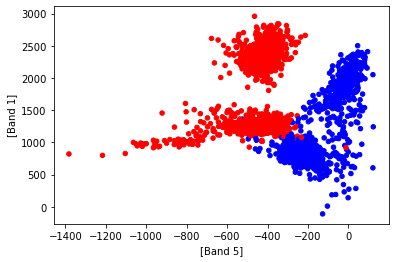

In [5]:
#plot the subset
subset['colour'] = subset['CLASS'].replace(0,'red').replace(1,'blue')

subset.plot.scatter(['Band 5'],['Band 1'],c=subset['colour'])

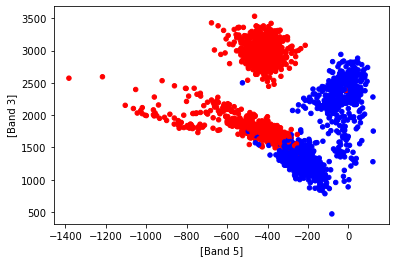

In [18]:
subset.plot.scatter(['Band 5'],['Band 3'],c=subset['colour'])

In [6]:
training_data = pd.read_csv(training_data_file_SUBSET,usecols=['Band 1','Band 3','Band 5'])
training_array = training_data.to_numpy()
training_array

array([[ 645.5204, 1003.5181, -149.7633],
       [1339.3654, 1842.9457, -409.859 ],
       [ 873.0041, 1354.2187, -261.0975],
       ...,
       [1351.6687, 1670.7796, -294.2326],
       [1234.8373, 1787.1765, -492.6776],
       [ 913.3376, 1455.3153, -254.7391]])

In [7]:
class_data = pd.read_csv(training_data_file_SUBSET,usecols=['CLASS'])
class_array = class_data.to_numpy()
class_array

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_array, class_array)

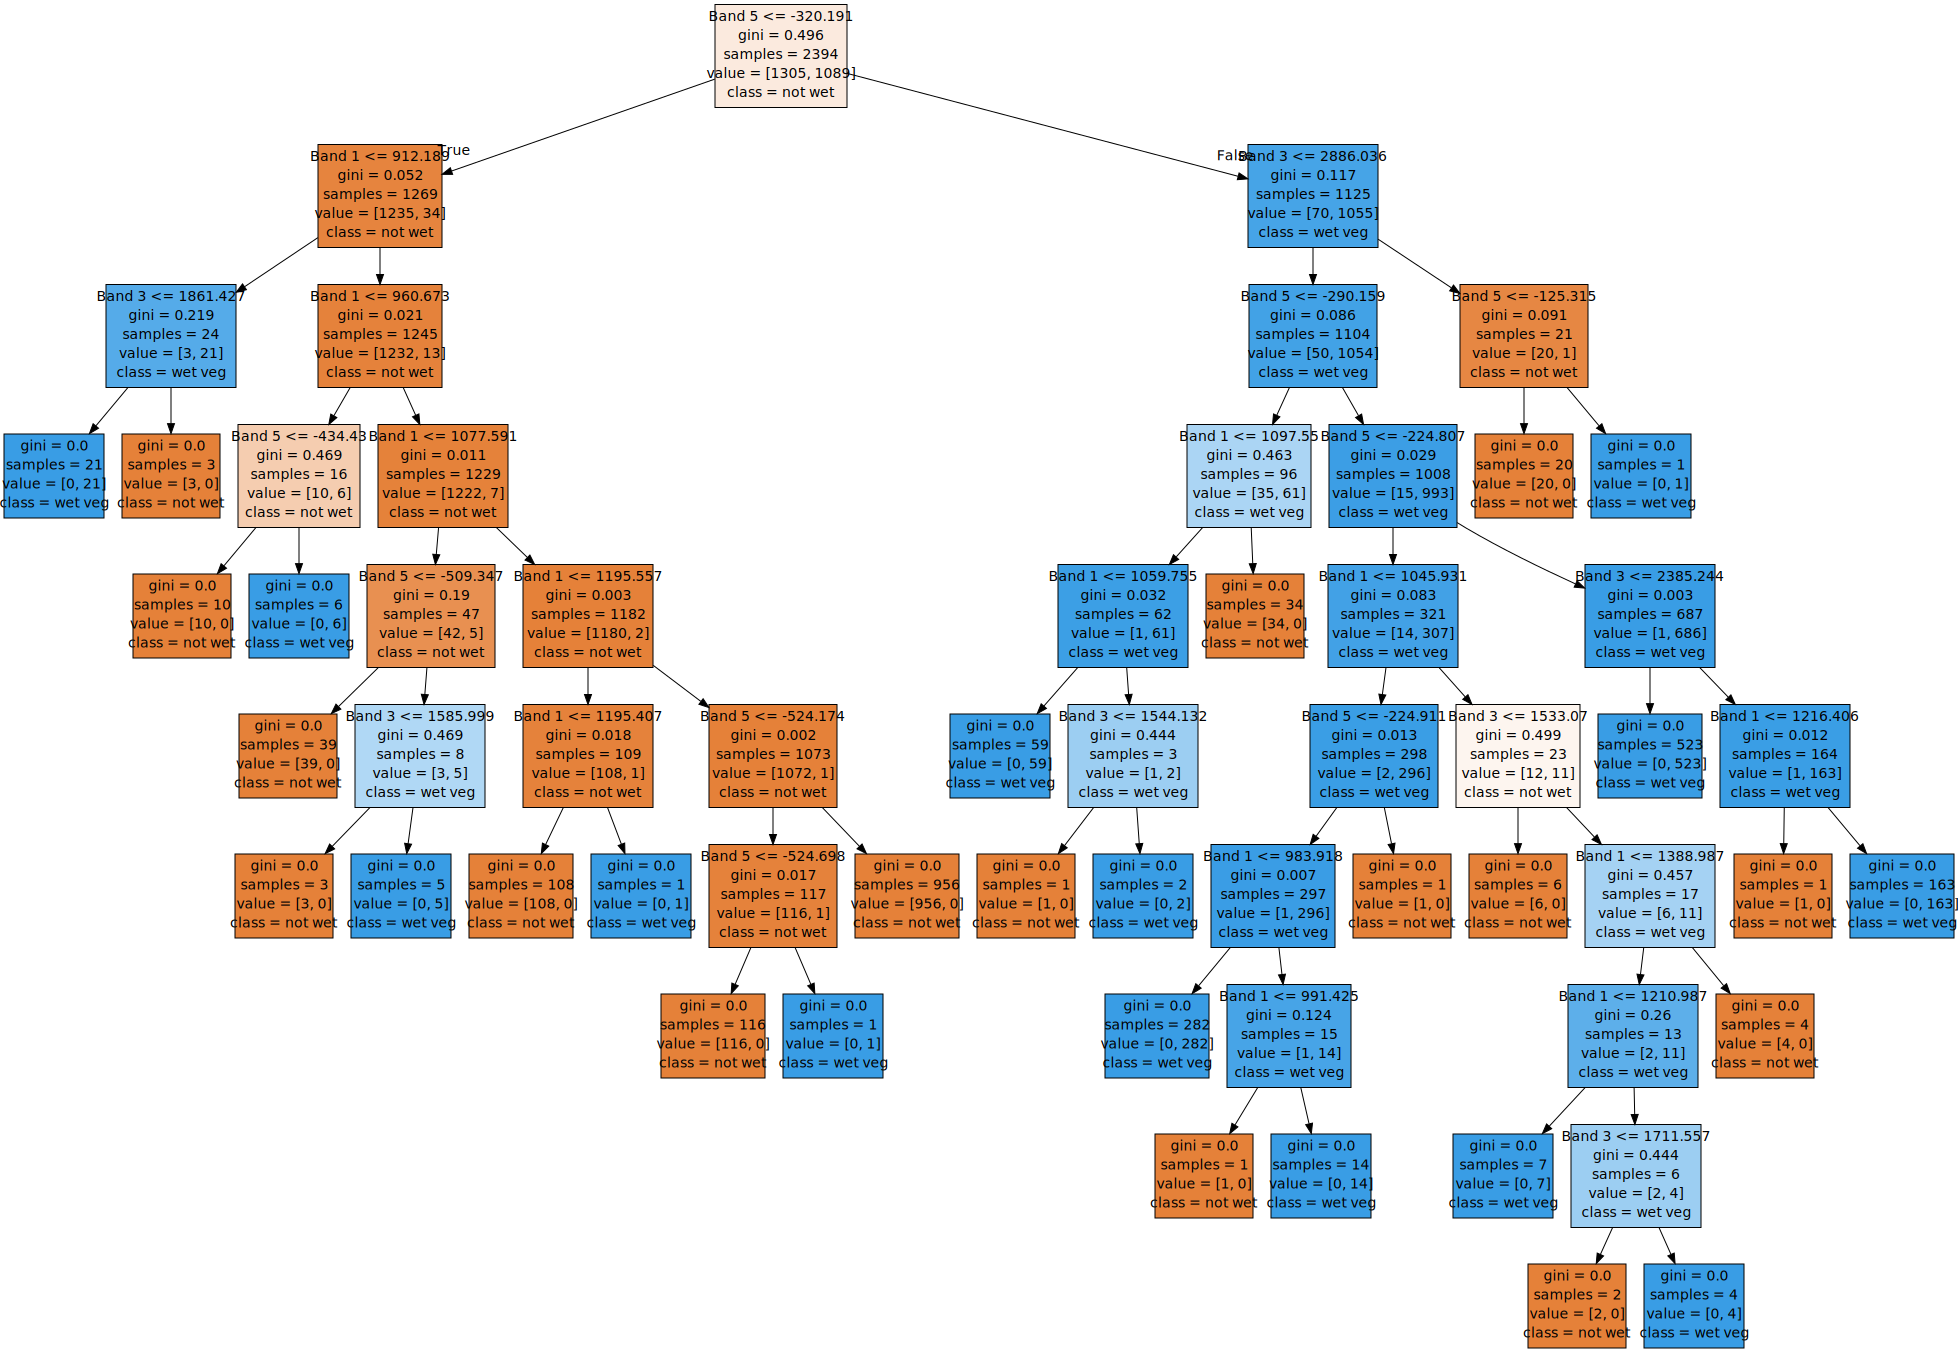

In [9]:
plot_tree = tree.export_graphviz(clf,feature_names = ['Band 1','Band 3', 'Band 5'], class_names = ['not wet', 'wet veg'],filled=True)

graph = graphviz.Source(plot_tree)  
test_save = '/g/data/u46/users/ck9738/Datasets/Tasselled_cap_tifs/Glue_subsets/decision_tree_complex_subset_50pct.pdf'
graph.render(test_save)
graph

In [10]:
testing_data = pd.read_csv(training_data_file, usecols=['Band 1','Band 3','Band 5'])
testing_array = testing_data.to_numpy()
test_results = clf.predict(testing_array)

In [11]:
total_samples = len(test_results)
total_samples

7981

In [12]:
actual_answer = pd.read_csv(training_data_file)
actual_answer['test_result'] = pd.Series(test_results)
actual_answer['difference'] = actual_answer['CLASS']-actual_answer['test_result']
actual_answer=actual_answer.replace(-1,1)

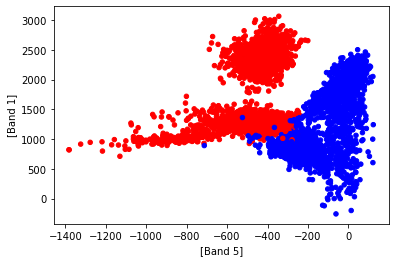

In [13]:
#plot the subset
actual_answer['colour'] = actual_answer['test_result'].replace(0,'red').replace(1,'blue')



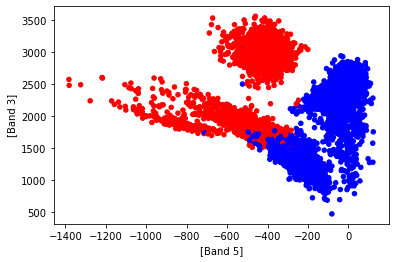

In [17]:
actual_answer.plot.scatter(['Band 5'],['Band 3'],c=actual_answer['colour'])

In [14]:
count_incorrect = actual_answer.sum()
count_incorrect.difference

40

In [15]:
num_correct = total_samples - int(count_incorrect.difference)

In [16]:
percent_correct = (num_correct/total_samples)*100
print(num_correct, 'are correct. this is equal to %',percent_correct)

7941 are correct. this is equal to % 99.49880967297331
